In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
np.random.seed(42)

In [14]:
p = np.random.random(999)
random_walk = np.zeros(1000)
random_walk_counter = np.zeros(1000)

In [21]:
# очень странное решение есть np.random.choice

for i in range(0, p.shape[0]):
    if (p[i] > 0.5):
        random_walk[i + 1] = random_walk[i] + 1
        random_walk_counter[i + 1] += 1
    else:
        random_walk[i + 1] = random_walk[i] - 1
        random_walk_counter[i + 1] -= 1

        
# #### мой тест
my_list = np.zeros(1000)
my_list[1:20] = 1
my_list[20:50] = -1
my_list[50:100] = -1
my_list[100:300] = -1
my_list[300:500] = 1
my_list[500:1000] = -1

random_walk = np.cumsum(my_list)
random_walk_counter = my_list

In [18]:
counter = np.empty(0)
moment = np.empty(0)
c = 0
k = 0
t = 0
repeat = 0
for i in range(1, p.shape[0]):
    if (random_walk_counter[i] == random_walk_counter[i - 1]):
        k += 1
        if ((k + 1) == 10) and (repeat == 0): #добавляем 1, потому что при таком алгоритме сравнения последний однонаправленный шаг не учитывается
            t = i
            repeat = 1 #если было несколько серий по 10 шагов в одну сторону подряд, то запишется только первый момент
    else:
        if (k != 0):
            counter = np.append(counter, (k + 1))
            moment = np.append(moment, (i - 1))
            k = 0
        else:
            k = 0

IndexError: index 1 is out of bounds for axis 0 with size 1

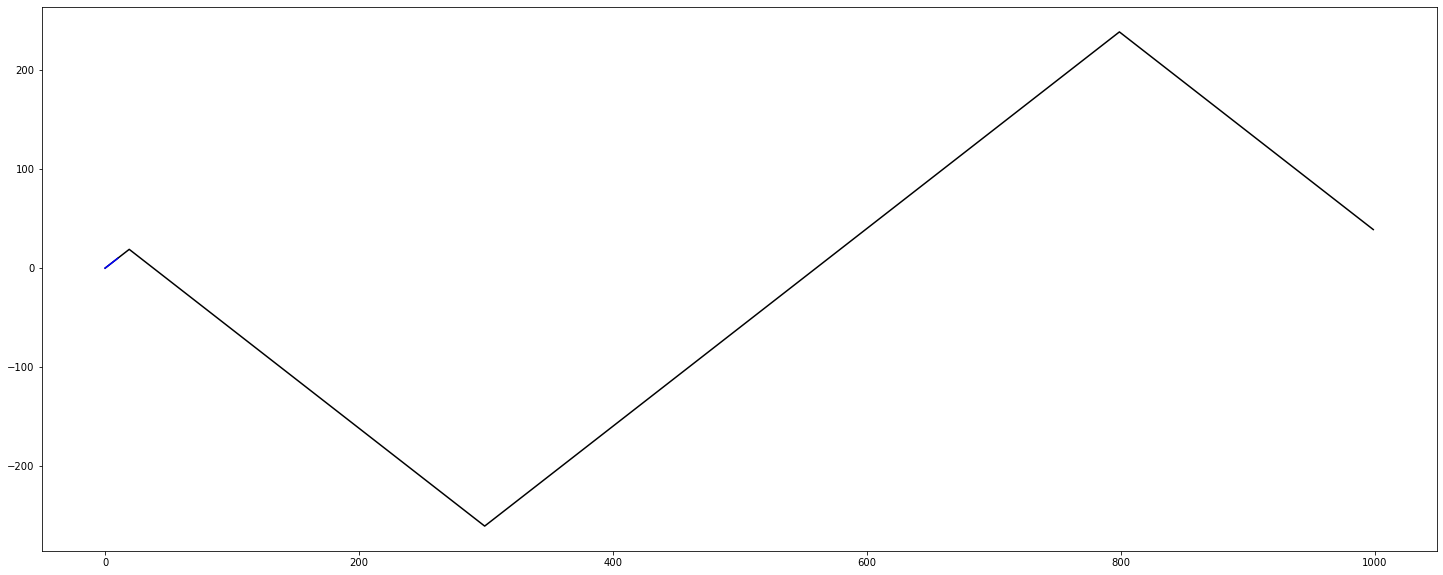

In [19]:
fig = plt.figure()
fig.set_figwidth(25)
fig.set_figheight(10) 
plt.plot(np.arange(1000), random_walk, c = 'black', label = 'Random Walk')
plt.plot(np.arange((t - 10),(t + 1)), random_walk[(t - 10):(t + 1)], c = 'b', label = '10 steps in the one direction')
plt.plot(np.arange((moment[np.where(counter == counter.max())[0][1]] - counter.max()),
                   (moment[np.where(counter == counter.max())[0][1]] + 1)), 
                    random_walk[int(moment[np.where(counter == counter.max())[0][1]] - counter.max()):int(moment[np.where(counter == counter.max())[0][1]] + 1)],
                    c = 'green', label = 'Max steps in the one direction')
plt.scatter(random_walk.argmin(), random_walk.min(), c = 'red', s = 50, label = 'Min')
plt.scatter(random_walk.argmax(), random_walk.max(), c = 'green', s = 50, label = 'Max')
plt.legend(fontsize = 15)

In [20]:
print('Максимальное количество шагов в одну сторону равно', counter.max(), 'и сделано начиная с шага', t - 10, 'или с шага', moment[np.where(counter == counter.max())[0][1]]) 
print('Первые десять однонаправленных шагов были совершены на шаге номер', t, "начиная с шага", t - 10)
print('Максимальное значение по траектории равно', random_walk.max())
print('Минимальное значение по траектории равно', random_walk.min())

IndexError: index 1 is out of bounds for axis 0 with size 1